<a href="https://colab.research.google.com/github/Tarunsaip/Machine_Learning/blob/master/Clean_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Part 1 : Data Analysis

In [0]:
# importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score,mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb
import scipy
import keras
from sklearn.model_selection import GridSearchCV, cross_validate

import matplotlib.image as mpimg
import seaborn as sns


In [0]:
data_train = pd.read_excel("/content/drive/My Drive/Data_Train.xlsx")
data_test = pd.read_excel("/content/drive/My Drive/Data_Test.xlsx")

In [101]:
data_train.shape , data_test.shape


((6019, 12), (1234, 11))

In [102]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [103]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [104]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [105]:
data_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [0]:
#data_train = data_train.dropna(how='any',axis=0)
#data_test = data_test.dropna(how='any',axis=0)
#print (data_train.isnull().sum())
##print (data_test.shape)
#print (data_test.isnull().sum())

In [107]:
data_test.Owner_Type.unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [108]:
data_test['Owner_Type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [0]:
#data_train["Owner_Type"].replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)
#data_test["Owner_Type"].replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)

In [0]:
#data_train = data_train[data_train.Owner_Type != 4]
#data_test = data_test[data_test.Owner_Type != 4]

In [111]:
print (len(data_train[data_train['Mileage'] == '0.0 kmpl']))
print (len(data_train[data_train['Power'] == 'null bhp']))

68
107


In [112]:
print (len(data_test[data_test['Mileage'] == '0.0 kmpl']))
print (len(data_test[data_test['Power'] == 'null bhp']))

13
22


In [0]:
#data_train = data_train[data_train.Mileage != '0.0 kmpl']
#data_test = data_test[data_test.Mileage != '0.0 kmpl']
#data_train = data_train[data_train.Power != 'null bhp']
#data_test = data_test[data_test.Power != 'null bhp']

In [114]:
data_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [115]:
data_train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [116]:
data_test['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [117]:
data_train.Kilometers_Driven.unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365])

In [118]:
data_test['Kilometers_Driven'].value_counts()

65000    18
70000    17
45000    16
60000    14
46000    14
         ..
23742     1
17700     1
66848     1
80724     1
51200     1
Name: Kilometers_Driven, Length: 755, dtype: int64

# Part 2 : Inferences , Modeling and Prediction

In [0]:
data_train = data_train[data_train['Kilometers_Driven'] > 1000]
data_train = data_train[data_train['Fuel_Type'] != 'Electric']

In [120]:
len(data_train)

6006

We will make a column with the age of car and remove year
    We will do in a temporary dataframe so that if we dont get required accuracy (We consider it to be lower root mean square ) and then scale it btw 0-1 to get the accuracy (If not satisfied we can callback)

**We will mix both the train and test sets into the temporary data frame then we will split it into the Test and Train in 10:90**

In [0]:
tdf = data_train.append(data_test, ignore_index=True, sort=False)
tdf['Seats'] = tdf['Seats'].fillna(5)

In [0]:
tdf['Age'] = 2020 - tdf['Year']

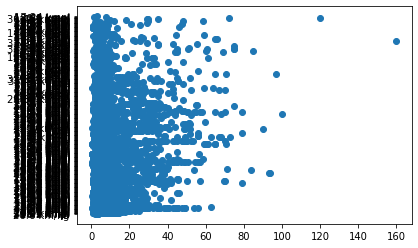

In [123]:
plt.scatter(x = data_train["Price"], y = data_train["Mileage"])
plt.show()

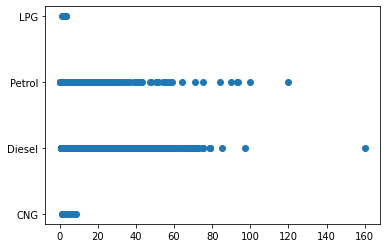

In [124]:
plt.scatter(x = data_train["Price"], y = data_train["Fuel_Type"])
plt.show()


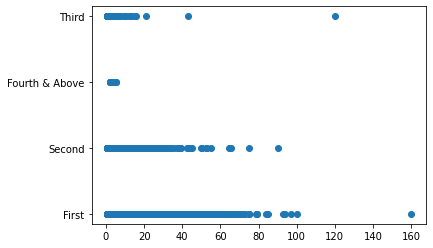

In [125]:
plt.scatter(x = data_train["Price"], y = data_train["Owner_Type"])
plt.show()

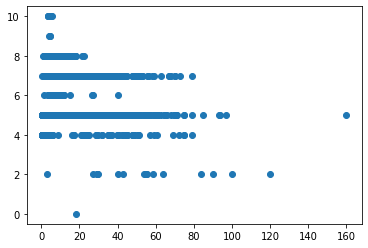

In [126]:
plt.scatter(x = data_train["Price"], y = data_train["Seats"])
plt.show()

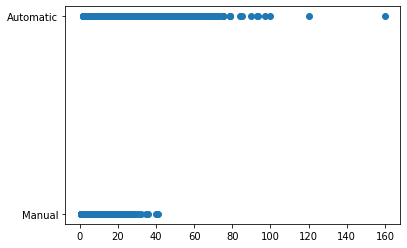

In [127]:
plt.scatter(x = data_train["Price"], y = data_train["Transmission"])
plt.show()

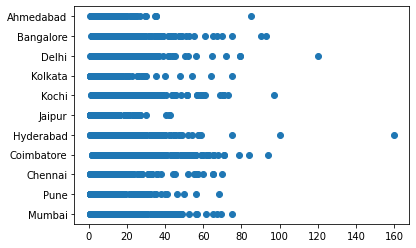

In [128]:
plt.scatter(x = data_train["Price"], y = data_train["Location"])
plt.show()

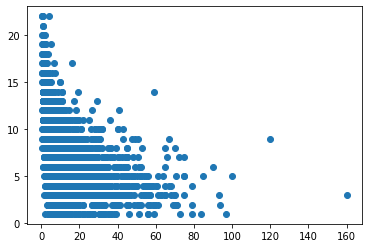

In [129]:
plt.scatter(x = tdf["Price"], y = tdf["Age"])
plt.show()

In [0]:
tdf['Year'] = tdf['Year'].astype('category')
tdf['Location'] = tdf['Location'].astype('category')

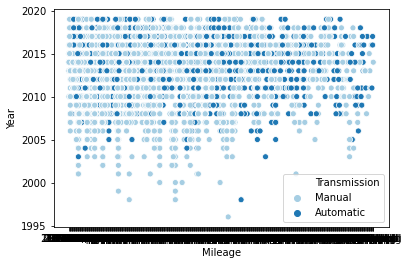

In [131]:
sns.scatterplot(x="Mileage", y="Year", hue="Transmission",
              data=tdf, palette='Paired', 
                   legend='full')

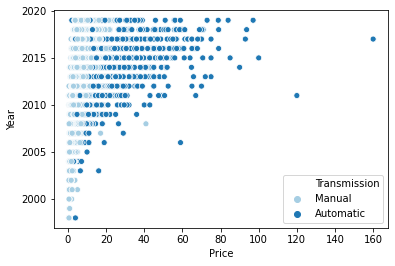

In [132]:
sns.scatterplot(x="Price", y="Year", hue="Transmission",
              data=tdf, palette='Paired', 
                   legend='full')

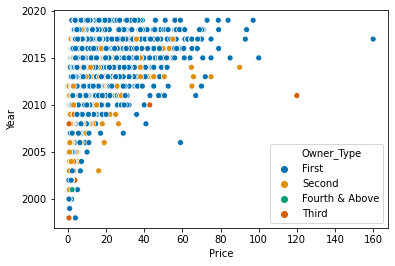

In [133]:
sns.scatterplot(x="Price", y="Year", hue="Owner_Type",
              data=tdf, palette='colorblind', 
                   legend='full')

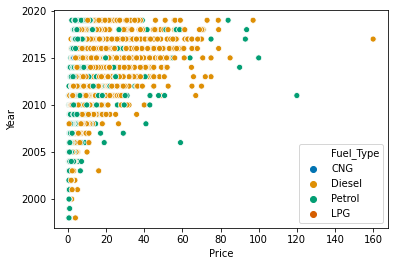

In [134]:
sns.scatterplot(x="Price", y="Year", hue="Fuel_Type",
              data=tdf, palette='colorblind', 
                   legend='full')

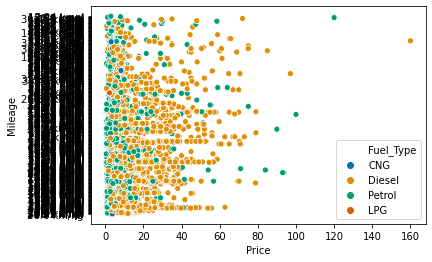

In [135]:
sns.scatterplot(x="Price", y="Mileage", hue="Fuel_Type",
              data=tdf, palette='colorblind', 
                   legend='full')

In [0]:
tdf = data_train.append(data_test, ignore_index=True, sort=False)
tdf['Mileage'] = tdf['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
tdf['Engine'] = tdf['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

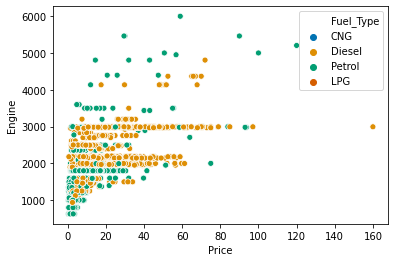

In [137]:
sns.scatterplot(x="Price", y="Engine", hue="Fuel_Type",
              data=tdf, palette='colorblind', 
                   legend='full')

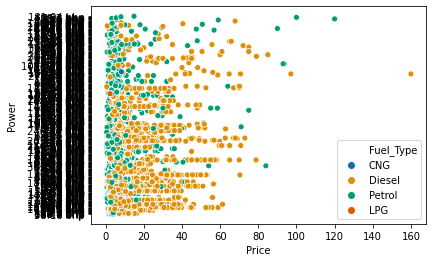

In [138]:
sns.scatterplot(x="Price", y="Power", hue="Fuel_Type",
              data=tdf, palette='colorblind', 
                   legend='full')

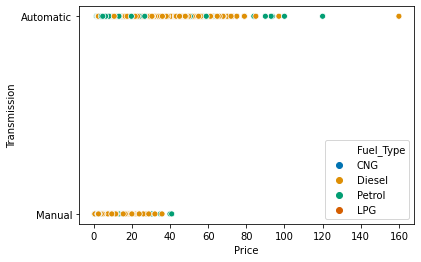

In [139]:
sns.scatterplot(x="Price", y="Transmission", hue="Fuel_Type",
              data=tdf, palette='colorblind', 
                   legend='full')

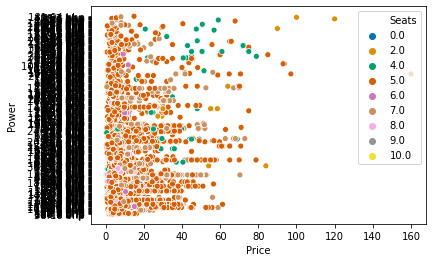

In [140]:
sns.scatterplot(x="Price", y="Power", hue="Seats",
              data=tdf, palette='colorblind', 
                   legend='full')

In [0]:
tdf['Year'] = tdf['Year'].astype('category')
tdf['Location'] = tdf['Location'].astype('category')
tdf['Fuel_Type'] = tdf['Fuel_Type'].astype('category')
tdf['Transmission'] = tdf['Transmission'].astype('category')
tdf['Owner_Type'] = tdf['Owner_Type'].astype('category')

In [0]:
tdf['Brand'] = tdf['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))
tdf['Power'] = tdf['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
tdf['Engine'] = tdf.groupby(['Brand']).transform(lambda x: x.fillna(x.median()))['Engine']
tdf['Power'] = tdf.groupby(['Brand']).transform(lambda x: x.fillna(x.median()))['Power']

In [0]:
def agg_fn(x):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_x = x.groupby(['Brand']).agg(agg_func)
    agg_x.columns = ['_'.join(col).strip() for col in agg_x.columns.values]
    agg_x.reset_index(inplace=True)
    
    agg_x = pd.merge(x, agg_x, on='Brand', how='left')
    
    return agg_x

In [0]:
tdf = agg_fn(tdf)

In [0]:
tf1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)
tdf_name = tf1.fit_transform(tdf['Name'])
tdf_name = pd.DataFrame(data=tdf_name.toarray(), columns=tf1.get_feature_names())
tdf = pd.concat([tdf, tdf_name], axis=1)

In [0]:
tdf.drop(['Name','Brand'], axis=1, inplace=True)

In [147]:
train_df = tdf[tdf['Price'].isnull()!=True]
test_df = tdf[tdf['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
train_df.shape, test_df.shape

((6006, 669), (1234, 668))

In [149]:
train_df['Price'] = np.log1p(train_df['Price'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values
Xtest = test_df
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [151]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4504, 668), (4504,), (1502, 668), (1502,))

In [171]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 400,
         'num_leaves': 25,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'feature_fraction': 0.7,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=100,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('rms log error:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.341953
[200]	valid_0's rmse: 0.202945
[300]	valid_0's rmse: 0.152819
[400]	valid_0's rmse: 0.132224
Did not meet early stopping. Best iteration is:
[400]	valid_0's rmse: 0.132224
rms log error: 0.1322239351576082


In [189]:
Xtest = test_df
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
ssc = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 2000,
         'num_leaves': 32,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'feature_fraction': 0.7
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

    ssc.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.12311255927681442


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.14450017176934266


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.1113048655584441


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.1403362710836122


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.12892774448928968


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.12741315464318154


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.11513253125515072


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.11626924353292958


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.13740309945777268


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.13326850295848178


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.10955751876643206


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.1373434936569726


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.12618469595219275


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.20733141048446055


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.12353124774610369


In [190]:
np.mean(ssc)

0.13210776737541208

In [181]:
pip install XlsxWriter

     |████████████████████████████████| 143kB 4.9MB/s 


In [0]:
apred = np.expm1(np.mean(y_pred_totlgb,0))
tdf_sub = pd.DataFrame(data=apred, columns=['Price'])
writer = pd.ExcelWriter('Prediction.xlsx', engine='xlsxwriter')

In [0]:
tdf_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()